<a href="https://colab.research.google.com/github/AsraniSanjana/PDL_winternship/blob/main/ColabFiles/classification_wo_scaling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task: Making a Classification Model and converting it into arduino Using **mc2gen** library

Instead of Scaling using **OHE** (get_dummies) which creates new cols for each value

use **replace method** which j converts categorial to numerical

# **Dataset**: https://www.kaggle.com/datasets/burak3ergun/loan-data-set

**Features**:

Loan_ID

Gender

Married

Dependents

Education

Self_Employed

ApplicantIncome

CoapplicantIncome

LoanAmount

Loan_Amount_Term

Credit_History

Property_Area

Loan_Status

**Data has dropped Load_id**

**X has dropped Load_id and Loan_status**

**y has Loan_status**


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import m2cgen as m2c
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

In [ ]:
data = pd.read_csv("loan_dataset.csv")

In [ ]:
def preprocessing(data):
    # replace with numerical values
    data['Dependents'].replace('3+', 3, inplace=True)
    data['Loan_Status'].replace('N', 0, inplace=True)
    data['Loan_Status'].replace('Y', 1, inplace=True)

    # encoding text values w numericals or u can do OHE using the code  X  = pd.get_dummies(X,columns=["Gender","Married","Education","Self_Employed","Property_Area"])
  #   this will create cols like:	Dependents	ApplicantIncome	CoapplicantIncome	LoanAmount	Loan_Amount_Term	Credit_History	Gender_Female	Gender_Male	Married_No	Married_Yes	Education_Graduate	Education_Not Graduate	Self_Employed_No	Self_Employed_Yes	Property_Area_Rural	Property_Area_Semiurban	Property_Area_Urban
    #  for each categorical value it creates a new col.


    data['Gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
    data['Married'].replace({'Yes': 1, 'No': 0}, inplace=True)
    data['Education'].replace({'Graduate': 1, 'Not Graduate': 0}, inplace=True)
    data['Self_Employed'].replace({'No': 0, 'Yes': 1}, inplace=True)
    data['Property_Area'].replace({'Urban': 1, 'Rural': 0, 'Semiurban': 2}, inplace=True)

    # handle missing data
    data['Married'].fillna(data['Married'].mode()[0], inplace=True)
    data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
    data['Education'].fillna(data['Education'].mode()[0], inplace=True)
    data['ApplicantIncome'].fillna(data['ApplicantIncome'].mode()[0], inplace=True)
    data['CoapplicantIncome'].fillna(data['CoapplicantIncome'].mode()[0], inplace=True)
    data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
    data['Property_Area'].fillna(data['Property_Area'].mode()[0], inplace=True)
    data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
    data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)
    data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
    data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

    # drop ID column



    # split features and target

    X= data
    y = data['Loan_Status'].values

    return X, y


In [ ]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,LP001003,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,LP001006,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,LP001008,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,LP002984,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [ ]:
data = data.drop('Loan_ID', axis=1)
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [ ]:
X,y = preprocessing(data)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1,1


In [ ]:
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
X = data.drop('Loan_Status', axis=1)
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1


In [ ]:
y = data['Loan_Status'].values
y

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

In [ ]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.0,0.0,0,1,0.0,5849,0.0,128.0,360.0,1.0,1
1,0.0,1.0,1,1,0.0,4583,1508.0,128.0,360.0,1.0,0
2,0.0,1.0,0,1,1.0,3000,0.0,66.0,360.0,1.0,1
3,0.0,1.0,0,0,0.0,2583,2358.0,120.0,360.0,1.0,1
4,0.0,0.0,0,1,0.0,6000,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,0.0,0,1,0.0,2900,0.0,71.0,360.0,1.0,0
610,0.0,1.0,3,1,0.0,4106,0.0,40.0,180.0,1.0,0
611,0.0,1.0,1,1,0.0,8072,240.0,253.0,360.0,1.0,1
612,0.0,1.0,2,1,0.0,7583,0.0,187.0,360.0,1.0,1


In [ ]:
classifier = LogisticRegression()

classifier.fit(X_train,y_train)

LogisticRegression()

In [ ]:
model_to_python = m2c.export_to_c(classifier)
model_to_python

'double score(double * input) {\n    return 0.05727140205607983 + input[0] * -0.06515430390640513 + input[1] * 0.28297800561175845 + input[2] * -0.03144473632085509 + input[3] * 0.1547848760769636 + input[4] * 0.021326288333392163 + input[5] * -0.000017228360802755462 + input[6] * -0.000053332148144339905 + input[7] * -0.0002728116268478814 + input[8] * -0.0018938430436221062 + input[9] * 1.1213533789932297 + input[10] * 0.4313734633305856;\n}\n'

In [ ]:
test_data = X_test.iloc[1]
print(test_data)

Gender                 0.0
Married                1.0
Dependents               3
Education                1
Self_Employed          0.0
ApplicantIncome       6417
CoapplicantIncome      0.0
LoanAmount           157.0
Loan_Amount_Term     180.0
Credit_History         1.0
Property_Area            0
Name: 539, dtype: object


In [ ]:
input = np.array([0, 1, 2, 1, 0, 4006,1526, 168, 360, 1,  1]).reshape(1, -1)

pred = classifier.predict(input)
print("prediction result: {}".format(pred))

prediction result: [1]


In [ ]:
# sample_input = {
#     'Dependents': 0,
#     'Education': 'No',
#     'Self_Employed': 'No',
#     'ApplicantIncome': 5849,
#     'CoapplicantIncome': 0,
#     'LoanAmount': 128,
#     'Loan_Amount_Term': 360,
#     'Credit_History': 1,
#     'Property_Area': 'Rural',
#     'Gender': 'Male',
#     'Married': 'No'
# }
sample_input = {
    'Dependents': 2,
    'Education': 1,
    'Self_Employed': '0',
    'ApplicantIncome': 4006	,
    'CoapplicantIncome': 1526,
    'LoanAmount': 168,
    'Loan_Amount_Term': 360,
    'Credit_History': 1,
    'Property_Area': '1',
    'Gender': '0',
    'Married': '1'
}
# run the preprocessing fn here
pred = classifier.predict(input)
print("prediction result: {}".format(pred))

prediction result: [1]


In [ ]:
model_to_python = m2c.export_to_python(classifier)
model_to_python

'def score(input):\n    return 0.05727140205607983 + input[0] * -0.06515430390640513 + input[1] * 0.28297800561175845 + input[2] * -0.03144473632085509 + input[3] * 0.1547848760769636 + input[4] * 0.021326288333392163 + input[5] * -0.000017228360802755462 + input[6] * -0.000053332148144339905 + input[7] * -0.0002728116268478814 + input[8] * -0.0018938430436221062 + input[9] * 1.1213533789932297 + input[10] * 0.4313734633305856\n'

# **Using classifier.predict**

In [ ]:
input = np.array([0, 1, 0, 1, 1, 0, 3707, 3166, 175, 1, 2]).reshape(1, -1)

pred = classifier.predict(input)
print("prediction result: {}".format(pred))

prediction result: [1]


# **Using Score method from code generated by the .export_to_python or c ()**

In [ ]:
def score(input):
    return 0.05727140205607983 + input[0] * -0.06515430390640513 + input[1] * 0.28297800561175845 + input[2] * -0.03144473632085509 + input[3] * 0.1547848760769636 + input[4] * 0.021326288333392163 + input[5] * -0.000017228360802755462 + input[6] * -0.000053332148144339905 + input[7] * -0.0002728116268478814 + input[8] * -0.0018938430436221062 + input[9] * 1.1213533789932297 + input[10] * 0.4313734633305856


input = [0, 1, 0, 1, 0, 0, 3307, 3166, 200, 1, 1]
pred = score(input)
print("prediction result: {}".format(int(pred)))



prediction result: 0


In [ ]:
pred

0.6289014928304715

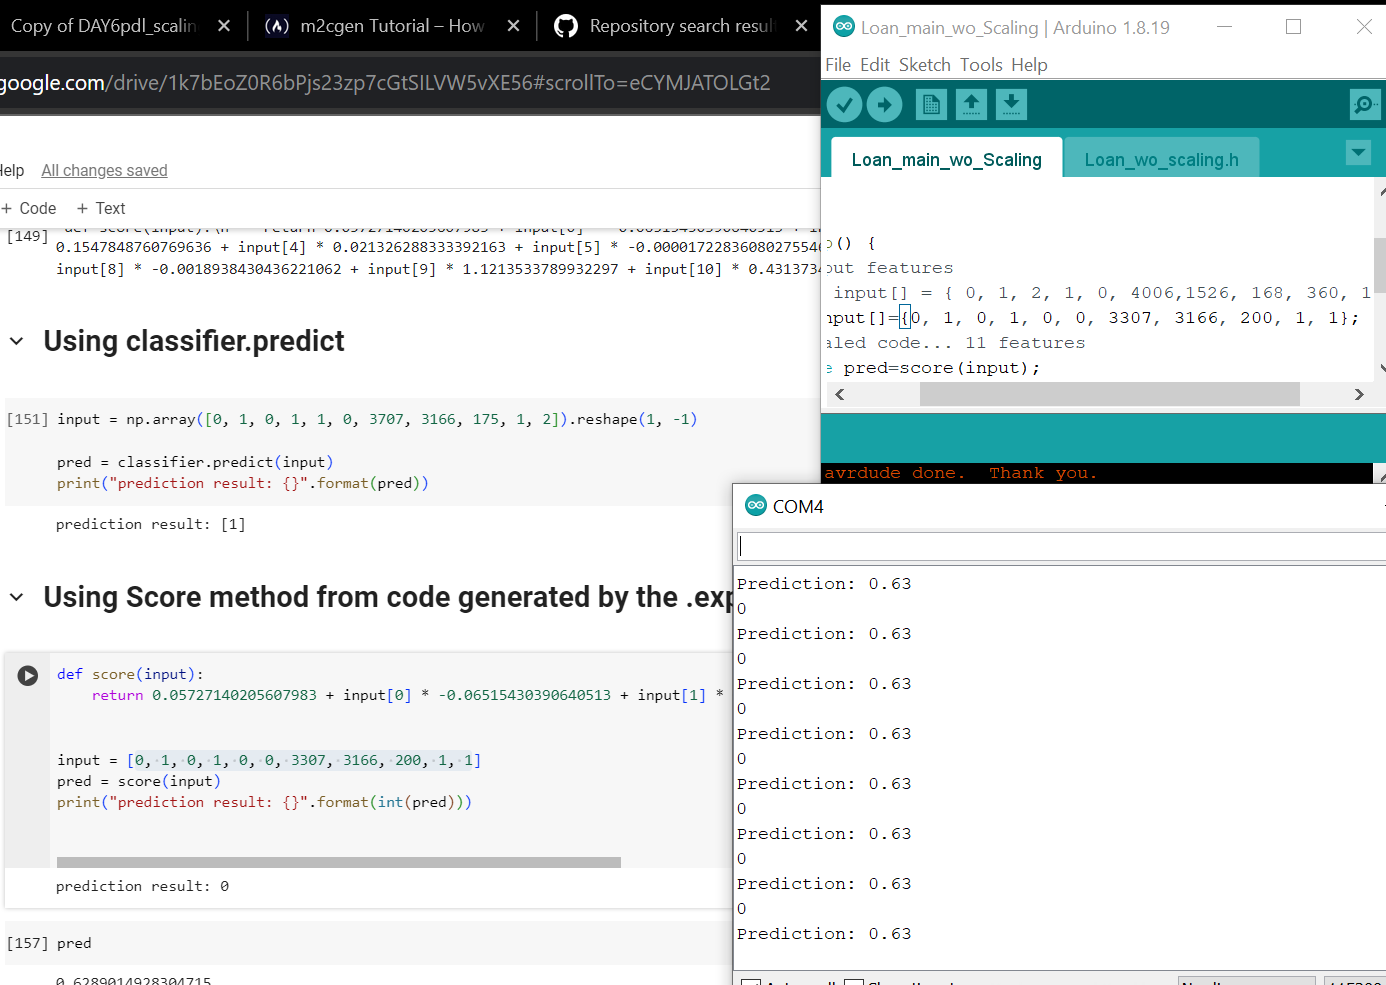

# Code for **Load_main_wo_scaling:**


\#include "Loan_wo_scaling.h"

void setup() {
   Serial.begin(115200);
}

void loop() {
   // Input features
//double input[] = { 0, 1, 2, 1, 0, 4006,1526, 168, 360, 1,  1};
double input[]={0, 1, 0, 1, 0, 0, 3307, 3166, 200, 1, 1};
// no-scaled code... 11 features
   double pred=score(input);
   
    Serial.print("Prediction: ");
    Serial.println(score(input));
    //Serial.println("prediction result: {}".format(int(pred)))
    Serial.println(int(pred));

}

# Code for **Loan_wo_scaling.h:**

double score(double * input) {
    return 0.05727140205607983 + input[0] * -0.06515430390640513 + input[1] * 0.28297800561175845 + input[2] * -0.03144473632085509 + input[3] * 0.1547848760769636 + input[4] * 0.021326288333392163 + input[5] * -0.000017228360802755462 + input[6] * -0.000053332148144339905 + input[7] * -0.0002728116268478814 + input[8] * -0.0018938430436221062 + input[9] * 1.1213533789932297 + input[10] * 0.4313734633305856;
}
